In [2]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import *
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.utils import plot_model

from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense
from tensorflow.keras.layers import Activation, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D 
from tensorflow.keras.layers import GlobalMaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.python.framework.ops import EagerTensor

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import pickle

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert x_test.shape == (10000, 32, 32, 3)
assert y_test.shape == (10000, 1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.16, random_state=42)

def plot(history, criteria, arch):
  plt.plot(history.history[criteria] , label = "training " + criteria)
  plt.plot(history.history["val_" + criteria], label = "validation " + criteria)
  plt.xlabel("The Iteration Number")
  plt.ylabel(criteria.upper())
  plt.title(arch)
  plt.legend()
  plt.show()

## training data 42K
##  testing data 10K
## validation data 8K

In [5]:
print("Train set size: ", len(x_train))
print("Test set size: ", len(x_test))
print("Valid set size: ", len(x_val))

Train set size:  42000
Test set size:  10000
Valid set size:  8000


(42000, 32, 32, 3)
[24]


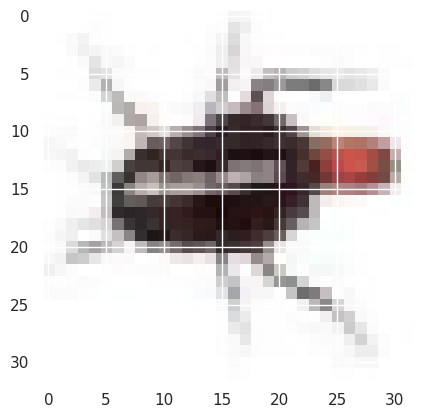

'cockroach'

In [6]:
dic = {0: 'apple', 1: 'aquarium_fish',2: 'baby',3: 'bear',4: 'beaver',5: 'bed',6: 'bee',7: 'beetle',8: 'bicycle',9: 'bottle',10: 'bowl',11: 'boy',12: 'bridge',13: 'bus',14: 'butterfly',
15: 'camel',16: 'can',17: 'castle',18: 'caterpillar',19: 'cattle',20: 'chair',21: 'chimpanzee',22: 'clock',23: 'cloud',24: 'cockroach',25: 'couch',26: 'cra',27: 'crocodile',28: 'cup',
29: 'dinosaur',30: 'dolphin',31: 'elephant',32: 'flatfish',33: 'forest',34: 'fox',35: 'girl',36: 'hamster',37: 'house',38: 'kangaroo',39: 'keyboard',40: 'lamp',41: 'lawn_mower',42: 'leopard',
43: 'lion',44: 'lizard',45: 'lobster',46: 'man',47: 'maple_tree',48: 'motorcycle',49: 'mountain',50: 'mouse',51: 'mushroom',52: 'oak_tree',53: 'orange',54: 'orchid',55: 'otter',56: 'palm_tree',
57: 'pear',58: 'pickup_truck',59: 'pine_tree',60: 'plain',61: 'plate',62: 'poppy',63: 'porcupine',64: 'possum',65: 'rabbit',66: 'raccoon',67: 'ray',68: 'road',69: 'rocket',70: 'rose',71: 'sea',
72: 'seal',73: 'shark',74: 'shrew',75: 'skunk',76: 'skyscraper',77: 'snail',78: 'snake',79: 'spider',80: 'squirrel',81: 'streetcar',82: 'sunflower',83: 'sweet_pepper',84: 'table',85: 'tank',
86: 'telephone',87: 'television',88: 'tiger',89: 'tractor',90: 'train',91: 'trout', 92: 'tulip', 93: 'turtle', 94: 'wardrobe', 95: 'whale', 96: 'willow_tree', 97: 'wolf', 98: 'woman', 99: 'worm'}

print(x_train.shape)
print(y_train[5713])
plt.imshow(x_train[5713])
plt.show()
dic[y_train[5713][0]]

In [8]:
def leNet(input_shape, num_classes):
    model=tf.keras.models.Sequential()

    model.add(tf.keras.layers.Resizing(227, 227, interpolation="gaussian", input_shape=input_shape))

    model.add (tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), activation='tanh'))
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

    model.add (tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='tanh')) 
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(120,activation='tanh'))
    model.add(tf.keras.layers.Dense(84,activation='tanh'))
    model.add(tf.keras.layers.Dense(num_classes,activation='softmax'))

    model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=['accuracy'])

    return model

model_lenet = leNet((32, 32, 3), 100)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history_leNet = model_lenet.fit(x_train, tf.keras.utils.to_categorical(y_train), epochs = 50, verbose = 1, validation_data=(x_val, tf.keras.utils.to_categorical(y_val)), callbacks=[callback])

Epoch 1/50
1313/1313 [==============================] - 108s 73ms/step - loss: 4.6508 - accuracy: 0.0095 - val_loss: 4.6538 - val_accuracy: 0.0095
Epoch 2/50
1313/1313 [==============================] - 103s 79ms/step - loss: 4.6433 - accuracy: 0.0097 - val_loss: 4.6444 - val_accuracy: 0.0116
Epoch 3/50
1313/1313 [==============================] - 112s 85ms/step - loss: 4.6378 - accuracy: 0.0105 - val_loss: 4.6282 - val_accuracy: 0.0109
Epoch 4/50
1313/1313 [==============================] - 116s 89ms/step - loss: 4.6369 - accuracy: 0.0096 - val_loss: 4.6293 - val_accuracy: 0.0101
Epoch 5/50
1313/1313 [==============================] - 114s 87ms/step - loss: 4.6360 - accuracy: 0.0099 - val_loss: 4.6345 - val_accuracy: 0.0113
Epoch 6/50
1313/1313 [==============================] - 104s 80ms/step - loss: 4.6353 - accuracy: 0.0097 - val_loss: 4.6343 - val_accuracy: 0.0110


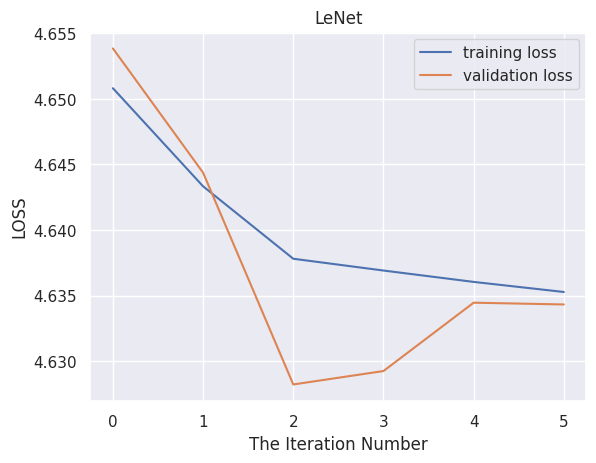

In [21]:
plot(history_leNet, "loss", "LeNet")

In [24]:
y_pred_leNet = (model_lenet.predict(x_test.reshape(-1, 32, 32, 3))).argmax(axis = 1).reshape(-1, 1)
y_pred_leNet.mean()

313/313 [==============================] - 16s 49ms/step


19.0

In [25]:
target_names = [dic[i] for i in range(100)]
print(classification_report(y_test, y_pred_leNet, target_names = target_names))

               precision    recall  f1-score   support

        apple       0.00      0.00      0.00       100
aquarium_fish       0.00      0.00      0.00       100
         baby       0.00      0.00      0.00       100
         bear       0.00      0.00      0.00       100
       beaver       0.00      0.00      0.00       100
          bed       0.00      0.00      0.00       100
          bee       0.00      0.00      0.00       100
       beetle       0.00      0.00      0.00       100
      bicycle       0.00      0.00      0.00       100
       bottle       0.00      0.00      0.00       100
         bowl       0.00      0.00      0.00       100
          boy       0.00      0.00      0.00       100
       bridge       0.00      0.00      0.00       100
          bus       0.00      0.00      0.00       100
    butterfly       0.00      0.00      0.00       100
        camel       0.00      0.00      0.00       100
          can       0.00      0.00      0.00       100
       ca

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
def Alex(input_shape, num_classes):
  model=tf.keras.models.Sequential()

  model.add(layers.experimental.preprocessing.Resizing(227, 227, interpolation="bilinear", input_shape=input_shape))

  model.add(layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4),activation='relu',input_shape=(227, 227,3),padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(3,3),strides=(2,2)))

  model.add(layers.Conv2D(filters=256, kernel_size=(5,5), padding="same",activation="relu",strides=(1,1)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(3,3),strides=(2,2)))

  model.add(layers.Conv2D(kernel_size=(3,3),filters=384,activation='relu',padding='same',strides=(1,1)))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(filters=384,kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(filters=256, kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(3,3),strides=(2,2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(4096,activation='relu'))
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(4096,activation='relu'))
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(num_classes, activation='softmax'))

  model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=['accuracy'])

  return model

model_alex = Alex((32, 32, 3), 100)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history_alex = model_alex.fit(x_train, tf.keras.utils.to_categorical(y_train), epochs = 50, validation_data=(x_val, tf.keras.utils.to_categorical(y_val)), callbacks=[callback])

Epoch 1/50
1313/1313 [==============================] - 155s 113ms/step - loss: 5.1881 - accuracy: 0.0110 - val_loss: 4.6070 - val_accuracy: 0.0080
Epoch 2/50
1313/1313 [==============================] - 64s 48ms/step - loss: 4.6524 - accuracy: 0.0099 - val_loss: 4.6079 - val_accuracy: 0.0080
Epoch 3/50
1313/1313 [==============================] - 64s 49ms/step - loss: 4.6118 - accuracy: 0.0087 - val_loss: 4.6069 - val_accuracy: 0.0093
Epoch 4/50
1313/1313 [==============================] - 64s 49ms/step - loss: 4.6071 - accuracy: 0.0093 - val_loss: 4.6068 - val_accuracy: 0.0086
Epoch 5/50
1313/1313 [==============================] - 63s 48ms/step - loss: 4.6061 - accuracy: 0.0087 - val_loss: 4.6070 - val_accuracy: 0.0080
Epoch 6/50
1313/1313 [==============================] - 65s 50ms/step - loss: 4.7171 - accuracy: 0.0100 - val_loss: 4.6073 - val_accuracy: 0.0088
Epoch 7/50
1313/1313 [==============================] - 65s 50ms/step - loss: 4.6060 - accuracy: 0.0089 - val_loss: 4.6071

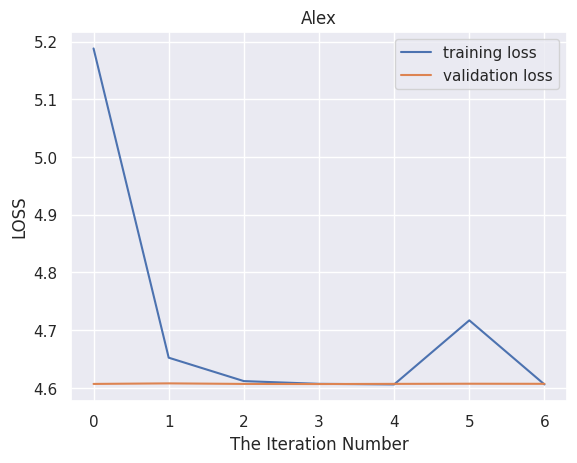

313/313 [==============================] - 4s 14ms/step


In [9]:
plot(history_alex, "loss", "Alex")
y_pred_alex = (model_alex.predict(x_test.reshape(-1, 32, 32, 3))).argmax(axis = 1).reshape(-1, 1)

In [10]:
print(classification_report(y_test, y_pred_alex, target_names = target_names))

NameError: ignored

In [4]:
def VGG16(input_shape, num_classes):
    model=tf.keras.models.Sequential()

    # model.add(tf.keras.layers.Resizing(224, 224, interpolation="gaussian", input_shape=input_shape))
    model.add(tf.keras.layers.Input(input_shape))

    model.add (tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu',padding="same" ) )
    model.add (tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu',padding="same" ) )
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add (tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu',padding="same" ) )
    model.add (tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu',padding="same" ) )
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add (tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu',padding="same" ) )
    model.add (tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu',padding="same" ) )
    model.add (tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu',padding="same" ) )
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add (tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu',padding="same" ) )
    model.add (tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu',padding="same" ) )
    model.add (tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu',padding="same" ) )
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add (tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu',padding="same" ) )
    model.add (tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu',padding="same" ) )
    model.add (tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu',padding="same" ) )
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(4096,activation='relu'))
    model.add(tf.keras.layers.Dense(4096,activation='relu'))

    model.add(tf.keras.layers.Dense(num_classes,activation='softmax'))

    model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=['accuracy'])

    return model

model_vgg = VGG16((32, 32, 3), 100)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history_vgg = model_vgg.fit(x_train, tf.keras.utils.to_categorical(y_train), epochs = 50, verbose = 1, validation_data=(x_val, tf.keras.utils.to_categorical(y_val)), callbacks=[callback])

Epoch 1/50
1313/1313 [==============================] - 51s 34ms/step - loss: 4.8391 - accuracy: 0.0097 - val_loss: 4.6062 - val_accuracy: 0.0077
Epoch 2/50
1313/1313 [==============================] - 43s 33ms/step - loss: 4.6058 - accuracy: 0.0088 - val_loss: 4.6067 - val_accuracy: 0.0080
Epoch 3/50
1313/1313 [==============================] - 43s 33ms/step - loss: 4.6058 - accuracy: 0.0092 - val_loss: 4.6069 - val_accuracy: 0.0077
Epoch 4/50
1313/1313 [==============================] - 43s 33ms/step - loss: 4.6058 - accuracy: 0.0080 - val_loss: 4.6071 - val_accuracy: 0.0077


In [ ]:
plot(history_alex, "loss", "Alex")

In [ ]:
y_pred_vgg = (model_alex.predict(x_test.reshape(-1, 32, 32, 3))).argmax(axis = 1).reshape(-1, 1)
print(classification_report(y_test, y_pred_vgg, target_names = target_names))

In [11]:
def MobileNet_V2(input_shape = (32, 32, 3), classes = 100):

  # Create an instance of pre-trained mobile net model
  base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                                include_top=False,
                                                weights='imagenet')

  # Add dense, dropout and batch normalization layers on the pre-trained model
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(256, activation='relu')(x)
  x = BatchNormalization()(x)
  x = Dropout(0.5)(x)
  x = Dense(units=4096, activation='relu')(x)
  x = Dense(units=4096, activation='relu')(x)
  x = Dense(units=512, activation='relu')(x)
  predictions = Dense(classes, activation='softmax')(x)

  # Create final output layer with SoftMax activation function
  model = Model(inputs=base_model.input, outputs=predictions)

  # Change batch size, activation function and optimize as rmsprop
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

model_mobileNet = MobileNet_V2((32, 32, 3), 100)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history_mobileNet = model_mobileNet.fit(x_train, tf.keras.utils.to_categorical(y_train), epochs = 50, verbose = 1, validation_data=(x_val, tf.keras.utils.to_categorical(y_val)), callbacks=[callback])

9406464/9406464 [==============================] - 2s 0us/step
Epoch 1/50
1313/1313 [==============================] - 81s 37ms/step - loss: 4.4978 - accuracy: 0.0183 - val_loss: 5.3991 - val_accuracy: 0.0117
Epoch 2/50
1313/1313 [==============================] - 54s 41ms/step - loss: 4.2791 - accuracy: 0.0289 - val_loss: 5.2129 - val_accuracy: 0.0285
Epoch 3/50
1313/1313 [==============================] - 46s 35ms/step - loss: 4.0432 - accuracy: 0.0426 - val_loss: 5.5714 - val_accuracy: 0.0344
Epoch 4/50
1313/1313 [==============================] - 43s 33ms/step - loss: 3.8368 - accuracy: 0.0647 - val_loss: 4.5244 - val_accuracy: 0.0615
Epoch 5/50
1313/1313 [==============================] - 43s 33ms/step - loss: 3.5899 - accuracy: 0.0887 - val_loss: 4.6226 - val_accuracy: 0.0599
Epoch 6/50
1313/1313 [==============================] - 55s 42ms/step - loss: 3.4371 - accuracy: 0.1111 - val_loss: 5.9577 - val_accuracy: 0.0499
Epoch 7/50
1313/1313 [==============================] - 45s 3

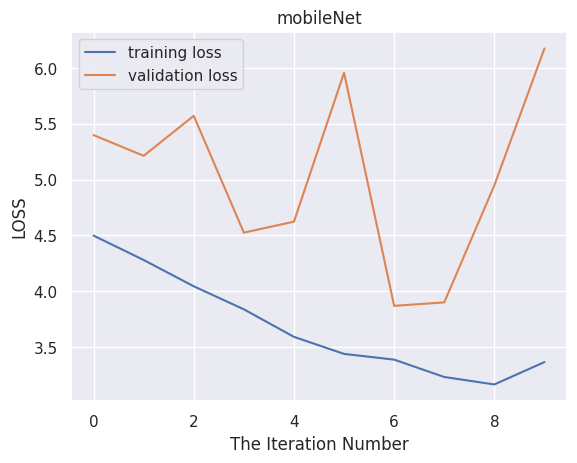

In [12]:
plot(history_mobileNet, "loss", "mobileNet")

In [14]:
y_pred_mobileNet = (model_mobileNet.predict(x_test.reshape(-1, 32, 32, 3))).argmax(axis = 1).reshape(-1, 1)
print(classification_report(y_test, y_pred_mobileNet))

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.38      0.09      0.15       100
           1       0.00      0.00      0.00       100
           2       0.50      0.03      0.06       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.01      0.01      0.01       100
           6       0.05      0.01      0.02       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.05      0.19      0.08       100
          13       0.01      0.02      0.01       100
          14       0.00      0.00      0.00       100
          15       0.00      0.00      0.00       100
          16       0.04   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
def DenseNet121(input_shape = (32, 32, 3), classes = 100):
    
  # Create an instance of a pre-trained model - DenseNet121
  # inp = layers.experimental.preprocessing.Resizing(227, 227, interpolation="bilinear", input_shape=input_shape)
  base_model = tf.keras.applications.DenseNet121(input_shape=(32, 32, 3), include_top=False, weights='imagenet') # (inp)

  # Freeze the top layers of the pre-trained model
  for layer in base_model.layers:
      layer.trainable = True

  # Add a dense layer and dropout layer
  x = base_model.output
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = Dense(units = 4096, activation='relu')(x)
  x = Dense(units = 4096, activation='relu')(x)
  x = Dense(units = 512, activation='relu')(x)
  x = Dropout(0.2)(x)
  predictions = Dense(classes, activation='softmax')(x)

  # Create the final model
  model = Model(inputs=base_model.input, outputs=predictions)

  # Compile the model
  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

model_DenseNet = DenseNet121((32, 32, 3), 100)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history_DenseNet = model_DenseNet.fit(x_train, tf.keras.utils.to_categorical(y_train), epochs = 50, verbose = 1, validation_data=(x_val, tf.keras.utils.to_categorical(y_val)), callbacks=[callback])

Epoch 1/50
1313/1313 [==============================] - 184s 84ms/step - loss: 3.9992 - accuracy: 0.0669 - val_loss: 3.7563 - val_accuracy: 0.0895
Epoch 2/50
1313/1313 [==============================] - 104s 79ms/step - loss: 3.5530 - accuracy: 0.1243 - val_loss: 7.5462 - val_accuracy: 0.0924
Epoch 3/50
1313/1313 [==============================] - 102s 78ms/step - loss: 3.5726 - accuracy: 0.1299 - val_loss: 3.6128 - val_accuracy: 0.1250
Epoch 4/50
1313/1313 [==============================] - 105s 80ms/step - loss: 3.3314 - accuracy: 0.1735 - val_loss: 6.6979 - val_accuracy: 0.0253
Epoch 5/50
1313/1313 [==============================] - 103s 79ms/step - loss: 3.3476 - accuracy: 0.1762 - val_loss: 3.1469 - val_accuracy: 0.2080
Epoch 6/50
1313/1313 [==============================] - 106s 81ms/step - loss: 3.3035 - accuracy: 0.1826 - val_loss: 3.4118 - val_accuracy: 0.1665
Epoch 7/50
1313/1313 [==============================] - 102s 78ms/step - loss: 3.5326 - accuracy: 0.1513 - val_loss: 3

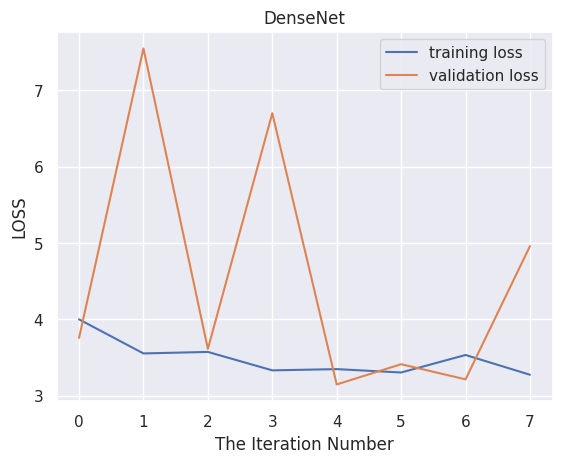

In [17]:
plot(history_DenseNet, "loss", "DenseNet")

In [19]:
y_pred_mobileNet = (model_mobileNet.predict(x_test.reshape(-1, 32, 32, 3))).argmax(axis = 1).reshape(-1, 1)
print(classification_report(y_test, y_pred_mobileNet))

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.38      0.09      0.15       100
           1       0.00      0.00      0.00       100
           2       0.50      0.03      0.06       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100
           5       0.01      0.01      0.01       100
           6       0.05      0.01      0.02       100
           7       0.00      0.00      0.00       100
           8       0.00      0.00      0.00       100
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.05      0.19      0.08       100
          13       0.01      0.02      0.01       100
          14       0.00      0.00      0.00       100
          15       0.00      0.00      0.00       100
          16       0.04   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Helpful Cells

In [ ]:
def download_history(history, name):
  import pickle
  from google.colab import files

  with open('history_' + name + '.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history_' + name + '.pkl')

np.save("Y_pred_DenseNet121.npy", y_pred_DenseNet121)
files.download("Y_pred_DenseNet121.npy")


dataframe = pd.DataFrame.from_dict(classification_report(y_test, y_pred_alex, target_names = target_names))
dataframe.to_csv('report_alex.csv', index = False)
files.download("report_alex.csv")

# with open('/content/history_alex.pkl', 'rb') as f:
#   loaded = pickle.load(f)